In [1]:
# conda install -c conda-forge selenium

# Extracting Financial Statements of Listed Companies from Screener.in and visualizing the trends

This notebook focuses on extracting financial statement numbers for Indian companies as obtained from Screener.in. In the subsequent sections we will focus on webcrawling through multiple stocks(listed on NSE India) pages. We will obtain the fundamental numbers and record a dataframe containing all financial statement numbers according to the ticker symbol. Subsquently, we will then visualize the trends across 2010-2021 around the fundamental numbers scraped to identify anomalies in financial statements or get a broad level performance of the company.

## Section 1: Webcrawling through Screener.in
This portion of the notebook focuses on webcrawling through multiple stock pages and extracting the PnL,Cash Flow and Balance Sheet Numbers Over the Years.


In [2]:
#Importing Required Libraries
import lxml as l
import html5lib as hl
import requests as r
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from selenium import webdriver
import time
import re
from random import randint
from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options
import os
import matplotlib.pyplot as plt

In [3]:
# Creating a chromedriver object and passing dummy values for password and username.

time.sleep(1)

# Opening Driver Object

dr = webdriver.Chrome("C:/Users/abhij/Downloads/chromedriver_win32/chromedriver")
# dr = webdriver.Edge("C:/Users/abhij/Downloads/edgedriver_win64/msedgedriver")
time.sleep(10)
dr.get("https://screener.in/login/")
time.sleep(5)

#Passing Username and Password to Login
username = dr.find_element_by_id("id_username")
username.clear()
time.sleep(1)
username.send_keys('Enter User ID/Email Here')
time.sleep(1)
password = dr.find_element_by_id("id_password")
time.sleep(1)
password.clear()
time.sleep(1)
password.send_keys('Enter Password here')

#Click on Login
dr.find_element_by_css_selector('body > main > div > div > div:nth-child(2) > form > button').click()

In [4]:
# Defining a function that converts a css selector path to an array of lists(each list corresponding to values for a year) 
# containing all the values within that selector path. 
# The selector paths corresponds to each table stored in the website
def css2np(css,years):
    ls = []
    for i in range(2,len(years)+2):
        ls.append(dr.find_element_by_css_selector(css+' > td:nth-child('+str(i)+')').text.replace('%','').replace(',',''))
    return pd.to_numeric(np.array(ls), errors='coerce')

#Defining dataframes for pnl,cash flows and balance sheet
conso_pnl_df=pd.DataFrame()
conso_cf_df=pd.DataFrame()
conso_bl_df=pd.DataFrame()

In [5]:
# Defining a list of companies for which dataframe is to created. Enter All Ticker Symbols you want data for in this list.

company_list=['HINDUNILVR','LAURUSLABS','COALINDIA','SEQUENT']   


for i in range(0,len(company_list)):
    time.sleep(5)
    url='https://www.screener.in/company/'+company_list[i]+'/consolidated/#top'
    dr.get(url)
    years = np.asarray([ x for x in dr.find_element_by_css_selector(
                                '#profit-loss > div.responsive-holder > table > thead').text.
                            split(' ') if '20' in x]).astype(int)

     # Profit And Loss Numbers
    

    salesCss = '#profit-loss > div.responsive-holder > table > tbody > tr:nth-child(1)'
    ExpensesCss= '#profit-loss > div.responsive-holder > table > tbody > tr:nth-child(2)'
    OperatingProfitCss= '#profit-loss > div.responsive-holder > table > tbody > tr:nth-child(3)'
    OPMCss= '#profit-loss > div.responsive-holder > table > tbody > tr:nth-child(4)'
    OtherIncomeCss= '#profit-loss > div.responsive-holder > table > tbody > tr:nth-child(5)'
    InterestCss= '#profit-loss > div.responsive-holder > table > tbody > tr:nth-child(6)'
    DepreciationCss = '#profit-loss > div.responsive-holder > table > tbody > tr:nth-child(7)'
    ProfitBeforeTaxCss = '#profit-loss > div.responsive-holder > table > tbody > tr:nth-child(8)'
    TaxCss = '#profit-loss > div.responsive-holder > table > tbody > tr:nth-child(9)'
    NetProfitCss = '#profit-loss > div.responsive-holder > table > tbody > tr:nth-child(10)'
    EPSinRsCss = '#profit-loss > div.responsive-holder > table > tbody > tr:nth-child(11)'
    DividendCss = '#profit-loss > div.responsive-holder > table > tbody > tr:nth-child(12)'
    Sales= css2np(salesCss,years)
    Expenses = css2np(ExpensesCss,years)
    OperatingProfit = css2np(OperatingProfitCss,years)
    OPM = css2np(OPMCss,years)
    OtherIncome = css2np(OtherIncomeCss,years)
    Interest = css2np(InterestCss,years)
    Depreciation = css2np(DepreciationCss,years)
    ProfitBeforeTax = css2np(ProfitBeforeTaxCss,years)
    Tax = css2np(TaxCss,years)
    NetProfit = css2np(NetProfitCss,years)
    EPSinRs= css2np(EPSinRsCss,years)
    Dividend = css2np(DividendCss,years)

    pnllist=[years,Sales,Expenses,OperatingProfit,OPM,OtherIncome,Interest,Depreciation,ProfitBeforeTax,Tax,NetProfit,EPSinRs,Dividend]

#      # Cash Flow Numbers
    
#     time.sleep(2)
#     dr.find_element_by_css_selector('#cash-flow > div.responsive-holder.fill-card-width > table > tbody > tr:nth-child(1) > td.text > button').click()
#     time.sleep(2)
    CFoperatingCss = '#cash-flow > div > table > tbody > tr:nth-child(1)'
#     ProfitFromOperationsCss = '#cash-flow > div > table > tbody > tr:nth-child(2)'
#     ReceivablesCss = '#cash-flow > div > table > tbody > tr:nth-child(3)'
#     InventoryCss = '#cash-flow > div > table > tbody > tr:nth-child(4)'
#     PayablesCss = '#cash-flow > div > table > tbody > tr:nth-child(5)'
#     LoansAdvancesCss = '#cash-flow > div > table > tbody > tr:nth-child(6)'
#     DepositsCss = '#cash-flow > div > table > tbody > tr:nth-child(7)'
#     OtherWCItemsCss = '#cash-flow > div > table > tbody > tr:nth-child(8)'
#     WCChangesCss = '#cash-flow > div > table > tbody > tr:nth-child(9)'
#     DirectTaxCss = '#cash-flow > div > table > tbody > tr:nth-child(10)'
#     OtherOperatingItemsCss = '#cash-flow > div > table > tbody > tr:nth-child(11)'
#     ExceptionalCfItemsCss = '#cash-flow > div > table > tbody > tr:nth-child(12)'
#     time.sleep(2)
#     dr.find_element_by_css_selector('#cash-flow > div.responsive-holder.fill-card-width > table > tbody > tr:nth-child(13) > td.text > button').click()
#     time.sleep(2)
    CFInvestingCss= '#cash-flow > div > table > tbody > tr:nth-child(2)'
#     FixedAssetsPurchasedCss='#cash-flow > div.responsive-holder.fill-card-width > table > tbody > tr:nth-child(14)'
#     FixedAssetsSoldCss='#cash-flow > div.responsive-holder.fill-card-width > table > tbody > tr:nth-child(15)'
#     InvestmentsPurchasedCss='#cash-flow > div > table > tbody > tr:nth-child(16)'
#     InvestmentsSoldCss='#cash-flow > div > table > tbody > tr:nth-child(17)'
#     InterestReceivedCss='#cash-flow > div > table > tbody > tr:nth-child(18)'
#     DividendsReceivedCss='#cash-flow > div > table > tbody > tr:nth-child(19)'
#     InvestInSubsidiariesCss='#cash-flow > div > table > tbody > tr:nth-child(20)'
#     LoansToSubsidiariesCss='#cash-flow > div > table > tbody > tr:nth-child(21)'
#     RedempAndCancellationOfSharesCss='#cash-flow > div > table > tbody > tr:nth-child(22)'
#     OtherInvestingItemsCss='#cash-flow > div > table > tbody > tr:nth-child(23)'
#     time.sleep(2)
#     dr.find_element_by_css_selector('#cash-flow > div.responsive-holder.fill-card-width > table > tbody > tr:nth-child(24) > td.text > button').click()
#     time.sleep(2)
    CFFinancingCss='#cash-flow > div > table > tbody > tr:nth-child(3)'
#     ProceedsFromSharesCss='#cash-flow > div > table > tbody > tr:nth-child(25)'
#     ProceedsFromDebenturesCss='#cash-flow > div > table > tbody > tr:nth-child(26)'
#     RedemptionOfDebenturesCss='#cash-flow > div > table > tbody > tr:nth-child(27)'
#     ProceedsFromBorrowingsCss='#cash-flow > div > table > tbody > tr:nth-child(28)'
#     RepaymentOfBorrowingsCss='#cash-flow > div > table > tbody > tr:nth-child(29)'
#     InterestPaidFinCss='#cash-flow > div > table > tbody > tr:nth-child(30)'
#     DividendsCss='#cash-flow > div > table > tbody > tr:nth-child(31)'
    
    CFOperating = css2np(CFoperatingCss,years)
#     ProfitFromOperations=css2np(ProfitFromOperationsCss,years)
#     Receivables =css2np(ReceivablesCss,years)
#     Inventory =css2np(InventoryCss,years)
#     Payables =css2np(PayablesCss,years)
#     LoansAdvances =css2np(LoansAdvancesCss,years)
#     OtherWCItems =css2np(OtherWCItemsCss,years)
#     Deposits=css2np(DepositsCss,years)
#     WCChanges =css2np(WCChangesCss,years)
#     DirectTax =css2np(DirectTaxCss,years)
#     OtherOperatingItems = css2np(OtherOperatingItemsCss,years)
#     ExceptionalCfItems = css2np(ExceptionalCfItemsCss,years)
    CFInvesting = css2np(CFInvestingCss,years)
#     FixedAssetsPurchased = css2np(FixedAssetsPurchasedCss,years)
#     InvestmentsPurchased = css2np(InvestmentsPurchasedCss,years)
#     InvestmentsSold = css2np(InvestmentsSoldCss,years)
#     InterestReceived = css2np(InterestReceivedCss,years)
#     InvestInSubsidiaries = css2np(InvestInSubsidiariesCss,years)
#     InvestmentInGroupCompanies = css2np(InvestmentInGroupCompaniesCss,years)
#     AcquisitionOfCompanies = css2np(AcquisitionOfCompaniesCss,years)
#     OtherInvestingItems = css2np(OtherInvestingItemsCss,years)
    CFFinancing = css2np(CFFinancingCss,years)
#     ProceedsFromShares = css2np(ProceedsFromSharesCss,years)
#     ProceedsFromDebentures = css2np(ProceedsFromDebenturesCss,years)
#     RedemptionOfDebentures = css2np(RedemptionOfDebenturesCss,years)
#     ProceedsFromBorrowings = css2np(ProceedsFromBorrowingsCss,years)
#     RepaymentOfBorrowings = css2np(RepaymentOfBorrowingsCss,years)
#     InterestPaidFin = css2np(InterestPaidFinCss,years)
#     Dividends = css2np(DividendsCss,years)

    CFlist=[years,CFOperating,CFInvesting,CFFinancing]
#     CFlist=[years,ProfitFromOperations,Receivables,Inventory,Payables,LoansAdvances,OtherWCItems,Deposits,WCChanges,DirectTax,OtherOperatingItems,ExceptionalCfItems,CFInvesting,FixedAssetsPurchased,InvestmentsPurchased,InvestmentsSold,InterestReceived,InvestInSubsidiaries,InvestmentInGroupCompanies,AcquisitionOfCompanies,OtherInvestingItems,CFFinancing,ProceedsFromShares,ProceedsFromDebentures,RedemptionOfDebentures,ProceedsFromBorrowings,RepaymentOfBorrowings,InterestPaidFin,Dividends,]

#   # Balance Sheet Numbers
    ShareCapitalCss ='#balance-sheet > div.responsive-holder.fill-card-width > table > tbody > tr:nth-child(1)'
    ReservesCss = '#balance-sheet > div.responsive-holder.fill-card-width > table > tbody > tr:nth-child(2)'
    BorrowingsCss = '#balance-sheet > div.responsive-holder.fill-card-width > table > tbody > tr:nth-child(3)'
    OtherLiabilitiesCss = '#balance-sheet > div.responsive-holder.fill-card-width > table > tbody > tr:nth-child(4)'
    TotalLiabilitiesCss = '#balance-sheet > div.responsive-holder.fill-card-width > table > tbody > tr:nth-child(5)'
    FixedAssetsCss = '#balance-sheet > div.responsive-holder.fill-card-width > table > tbody > tr:nth-child(6)'
    CWIPCss = '#balance-sheet > div.responsive-holder.fill-card-width > table > tbody > tr:nth-child(7)'
    InvestmentsCss ='#balance-sheet > div.responsive-holder.fill-card-width > table > tbody > tr:nth-child(8)'
    OtherAssetsCss  = '#balance-sheet > div.responsive-holder.fill-card-width > table > tbody > tr:nth-child(9)'
    TotalAssetsCss = '#balance-sheet > div.responsive-holder.fill-card-width > table > tbody > tr:nth-child(10)'
    
#   Ratios

    DaysPayableCss = '#ratios > div.responsive-holder.fill-card-width > table > tbody > tr:nth-child(2)'
    InventoryDaysCss = '#ratios > div.responsive-holder.fill-card-width > table > tbody > tr:nth-child(3)'
    
    Reserves= css2np(CFFinancingCss,years)
    Borrowings=css2np(BorrowingsCss,years)
    OtherLiabilities=css2np(OtherLiabilitiesCss,years)
    TotalLiabilities=css2np(TotalLiabilitiesCss,years)
    FixedAssets=css2np(FixedAssetsCss,years)
    CWIP=css2np(CWIPCss,years)
    Investments=css2np(InvestmentsCss,years)
    OtherAssets=css2np(OtherAssetsCss,years)
    TotalAssets=css2np(TotalAssetsCss,years)
    ReceivableTurnover=365/(css2np(DaysPayableCss,years))
    InventoryTurnover=365/(css2np(InventoryDaysCss,years))
    
    
    BalanceSheetlist=[years,Reserves,Borrowings,OtherLiabilities,TotalLiabilities,FixedAssets,CWIP,Investments,OtherAssets,TotalAssets,ReceivableTurnover,InventoryTurnover]
    
    
    

    company_pnl_df=pd.DataFrame(data = pnllist)
    company_pnl_df['Index']=["Year", "Sales", "Expenses", "Operating Profit ", "OPM%","Other Income", "Interest", "Depreciation", "Profit Before Tax","Tax","Net Profit","EPS in Rs","Dividend"]
    company_pnl_df.set_index('Index',inplace=True)
    company_pnl_df_1=company_pnl_df.T
    company_pnl_df_1.reset_index(drop=True,inplace=True)
    company_pnl_df_1['TICKER/Company Name']=[company_list[i]]*len(company_pnl_df_1)
    conso_pnl_df= conso_pnl_df.append(company_pnl_df_1)
    
    company_cf_df=pd.DataFrame(data = CFlist)
#     company_cf_df['Index']=['Year','ProfitFromOperations','Receivables','Inventory','Payables','LoansAdvances','OtherWCItems','Deposits','WCChanges','DirectTax','OtherOperatingItems','ExceptionalCfItems','CFInvesting','FixedAssetsPurchased','InvestmentsPurchased','InvestmentsSold','InterestReceived','InvestInSubsidiaries','InvestmentInGroupCompanies','AcquisitionOfCompanies','OtherInvestingItems','CFFinancing','ProceedsFromShares','ProceedsFromDebentures','RedemptionOfDebentures','ProceedsFromBorrowings','RepaymentOfBorrowings','InterestPaidFin','Dividends',
#  ]
    company_cf_df['Index']=['Year', 'Cash From Operations', 'Cash From Investments', 'Cash From Financing']
    company_cf_df.set_index('Index',inplace=True)
    company_cf_df_1=company_cf_df.T
    company_cf_df_1.reset_index(drop=True,inplace=True)
    company_cf_df_1['TICKER/Company Name']=[company_list[i]]*len(company_cf_df_1)
    conso_cf_df= conso_cf_df.append(company_cf_df_1)
    
    company_bl_df=pd.DataFrame(data = BalanceSheetlist)
    company_bl_df['Index']=['Year', 'Reserves','Borrowings','OtherLiabilities','TotalLiabilities','FixedAssets','CWIP','Investments','OtherAssets','TotalAssets','ReceivableTurnover','InventoryTurnover']
    company_bl_df.set_index('Index',inplace=True)
    company_bl_df_1=company_bl_df.T
    company_bl_df_1.reset_index(drop=True,inplace=True)
    company_bl_df_1['TICKER/Company Name']=[company_list[i]]*len(company_cf_df_1)
    conso_bl_df= conso_bl_df.append(company_bl_df_1)
    
# Closing opened selenium driver object    
dr.close()

## Section 2: Storing Values in Corresponding DataFrames and extracting to a CSV File(if required)
We visualize our created dataframes along with an option to extract it to a CSV file for further analysis. This dataframe is consolidated across all ticker symbols we inserted in the list in section 1. Numbers are populated for each FY year closing.

In [6]:
# Profit and Loss DataFrame
conso_pnl_df
# conso_pnl_df.to_csv(index=False)

Index,Year,Sales,Expenses,Operating Profit,OPM%,Other Income,Interest,Depreciation,Profit Before Tax,Tax,Net Profit,EPS in Rs,Dividend,TICKER/Company Name
0,2010.0,17738.0,15459.0,2279.0,13.0,715.0,7.0,192.0,2794.0,23.0,2157.0,9.89,66.0,HINDUNILVR
1,2011.0,20023.0,17305.0,2717.0,14.0,470.0,1.0,229.0,2957.0,22.0,2296.0,10.63,61.0,HINDUNILVR
2,2012.0,23436.0,19936.0,3500.0,15.0,357.0,2.0,234.0,3622.0,23.0,2791.0,12.91,58.0,HINDUNILVR
3,2013.0,27004.0,22784.0,4220.0,16.0,1123.0,26.0,251.0,5066.0,24.0,3829.0,17.71,104.0,HINDUNILVR
4,2014.0,29234.0,24475.0,4759.0,16.0,792.0,41.0,296.0,5215.0,24.0,3946.0,18.24,71.0,HINDUNILVR
5,2015.0,31972.0,26560.0,5412.0,17.0,1247.0,18.0,322.0,6320.0,31.0,4363.0,20.17,74.0,HINDUNILVR
6,2016.0,32186.0,26276.0,5910.0,18.0,486.0,17.0,353.0,6026.0,31.0,4151.0,19.18,83.0,HINDUNILVR
7,2017.0,33162.0,26834.0,6328.0,19.0,606.0,35.0,432.0,6467.0,31.0,4476.0,20.68,82.0,HINDUNILVR
8,2018.0,35545.0,28046.0,7499.0,21.0,353.0,26.0,520.0,7306.0,28.0,5214.0,24.09,83.0,HINDUNILVR
9,2019.0,39310.0,30430.0,8880.0,23.0,322.0,33.0,565.0,8604.0,30.0,6054.0,27.97,78.0,HINDUNILVR


In [7]:
# Cash Flow DataFrame
conso_cf_df

Index,Year,Cash From Operations,Cash From Investments,Cash From Financing,TICKER/Company Name
0,2010,3480,-1144,-2188,HINDUNILVR
1,2011,1924,-327,-2283,HINDUNILVR
2,2012,2932,-514,-1726,HINDUNILVR
3,2013,3605,63,-4147,HINDUNILVR
4,2014,3818,-475,-2960,HINDUNILVR
5,2015,3292,138,-3462,HINDUNILVR
6,2016,4171,-282,-3864,HINDUNILVR
7,2017,5185,-1173,-4214,HINDUNILVR
8,2018,6059,-1063,-4975,HINDUNILVR
9,2019,5800,-438,-5390,HINDUNILVR


In [8]:
# Balance Sheet DataFrame
conso_bl_df['Borrowings/Total Liabilities in %']= (conso_bl_df['Borrowings']/conso_bl_df['TotalLiabilities'])*100
conso_bl_df['Fixed Assets/Total Assets in %']= (conso_bl_df['FixedAssets']/conso_bl_df['TotalAssets'])*100
conso_bl_df['Current Ratio']= (conso_bl_df['Investments']+conso_bl_df['OtherAssets'])/(conso_bl_df['TotalLiabilities']-conso_bl_df['Reserves'])
conso_bl_df

Index,Year,Reserves,Borrowings,OtherLiabilities,TotalLiabilities,FixedAssets,CWIP,Investments,OtherAssets,TotalAssets,ReceivableTurnover,InventoryTurnover,TICKER/Company Name,Borrowings/Total Liabilities in %,Fixed Assets/Total Assets in %,Current Ratio
0,2010.0,-2188.0,11.0,6826.0,9506.0,2214.0,280.0,1224.0,5787.0,9506.0,3.443396,1.738095,HINDUNILVR,0.115716,23.290553,0.599538
1,2011.0,-2283.0,0.0,7613.0,10348.0,2223.0,289.0,1188.0,6647.0,10348.0,2.943548,2.147059,HINDUNILVR,0.000000,21.482412,0.620299
2,2012.0,-1726.0,0.0,7726.0,11407.0,2263.0,228.0,2322.0,6595.0,11407.0,3.882979,2.607143,HINDUNILVR,0.000000,19.838696,0.678977
3,2013.0,-4147.0,25.0,9202.0,12092.0,2431.0,222.0,2252.0,7186.0,12092.0,4.397590,2.765152,HINDUNILVR,0.206748,20.104201,0.581193
4,2014.0,-2960.0,46.0,10171.0,13754.0,2746.0,373.0,2838.0,7797.0,13754.0,4.244186,2.534722,HINDUNILVR,0.334448,19.965101,0.636293
5,2015.0,-3462.0,43.0,10359.0,14430.0,2821.0,516.0,3025.0,8067.0,14430.0,4.740260,2.683824,HINDUNILVR,0.297990,19.549550,0.619942
6,2016.0,-3864.0,177.0,8043.0,14793.0,3258.0,408.0,2592.0,8535.0,14793.0,4.866667,2.482993,HINDUNILVR,1.196512,22.023930,0.596398
7,2017.0,-4214.0,277.0,8685.0,15706.0,4419.0,229.0,3794.0,7264.0,15706.0,5.447761,2.310127,HINDUNILVR,1.763657,28.135744,0.555120
8,2018.0,-4975.0,0.0,10581.0,17862.0,4528.0,461.0,2873.0,10000.0,17862.0,5.615385,2.016575,HINDUNILVR,0.000000,25.349905,0.563691
9,2019.0,-5390.0,99.0,10663.0,18629.0,4715.0,406.0,2716.0,10792.0,18629.0,6.186441,2.212121,HINDUNILVR,0.531429,25.310001,0.562388


## Section 3: Trend Visualization of Specific Companies for Analysis and Anomaly Identification

This portion of the notebook focuses on visualizing a company's financial performance over the years. The user inputs a ticker symbol whose results have been collated in the dataframe created in Section 2. A few anomalies that could indicate potential fraud are:- 


1. **Cash Flows not correlated with Profit Margin**
    * If fraud is committed, net income may be artificially overstated, resulting in
        a profit margin ratio that is abnormally high compared to other periods. False expenses will cause an
        increase in expenses and a decrease in the profit margin ratio. Over time this ratio should be fairly
        consistent. 

2. **Comparing Current Ratio Trends to Liabilities:** 
    * In detecting fraud, this ratio can be a prime indicator of manipulation of accounts involved.
        Embezzlement will cause the ratio to decrease. Liability concealment will cause a more favorable ratio.

3. **Comparing Revenue/Sales to Receivables Turnover**
    * If fictitious sales have been recorded, this bogus income will
        never be collected. As a result, the turnover of receivables will decrease.

4. **Comparing Revenue/Sales to Inventory Turnover**
    * If cost of goods sold has increased due to theft of inventory (ending inventory has
        declined, but not through sales), then this ratio will be abnormally high


*Source:* [ACFE How to Detect and Prevent Financial Statement Fraud](https://www.acfe.com/uploadedFiles/Shared_Content/Products/Self-Study_CPE/How%20to%20Detect%20and%20Prevent%20Financial%20Statement%20Fraud%202017_Chapter%20Excerpt.pdf). 

In [9]:


#Company plotter function:
def chart_plot_pnl(df):
    
    ax[0, 0].plot(df.iloc[:,0],df.iloc[:,1], color='green')
    ax[0, 0].set_title('Sales growth %', fontsize=16)
    ax[0, 0].set_ylim(bottom=-20)

    # Operating profit margin
    ax[0, 1].plot( df.iloc[:,0],df.iloc[:,4], color='green')
    ax[0, 1].set_title('Operating Profit Margin in %', fontsize=16)
    ax[0, 1].set_ylim(bottom=-20)

    # Net- Profit Growth
    ax[0, 2].plot(df.iloc[:,0],df.iloc[:,10], color='green')
    ax[0, 2].set_title('Net profit growth %', fontsize=16)
    ax[0, 2].set_ylim(bottom=-100)

def chart_plot_cf(df):
    
    ax[1, 0].plot(df.iloc[:,0],df.iloc[:,1], color='red')
    ax[1, 0].set_title('Cash From Operations', fontsize=16)
    
    
    ax[1, 1].plot(df.iloc[:,0],df.iloc[:,2], color='red')
    ax[1, 1].set_title('Cash From Investing', fontsize=16)
    
    
    ax[1, 2].plot(df.iloc[:,0],df.iloc[:,3], color='red')
    ax[1, 2].set_title('Cash From Financing', fontsize=16)
    
    
def chart_plot_bl(df):
    
    ax[2, 0].plot(df.iloc[:,0],df.iloc[:,-3], color='blue')
    ax[2, 0].set_title('Borrowings/Total Liabilities in %', fontsize=16)
    
    ax[2, 1].plot(df.iloc[:,0],df.iloc[:,-2], color='blue')
    ax[2, 1].set_title('Fixed Assets/Total Assets in %', fontsize=16)
    
    ax[2, 2].plot(df.iloc[:,0],df.iloc[:,4], color='blue')
    ax[2, 2].set_title('Total Liabilities', fontsize=16)
    

    ax[3, 2].plot(df.iloc[:,0],df.iloc[:,-1], color='orange')
    ax[3, 2].set_title('Current Ratio', fontsize=16)
    
    ax[3, 0].plot(df.iloc[:,0],df.iloc[:,-6], color='orange')
    ax[3, 0].set_title('Recievables Turnover', fontsize=16)
    
    ax[3, 1].plot(df.iloc[:,0],df.iloc[:,-5], color='orange')
    ax[3, 1].set_title('Inventory Turnover', fontsize=16)
    


Enter Ticker of Company whose trends are to be visualized? SEQUENT


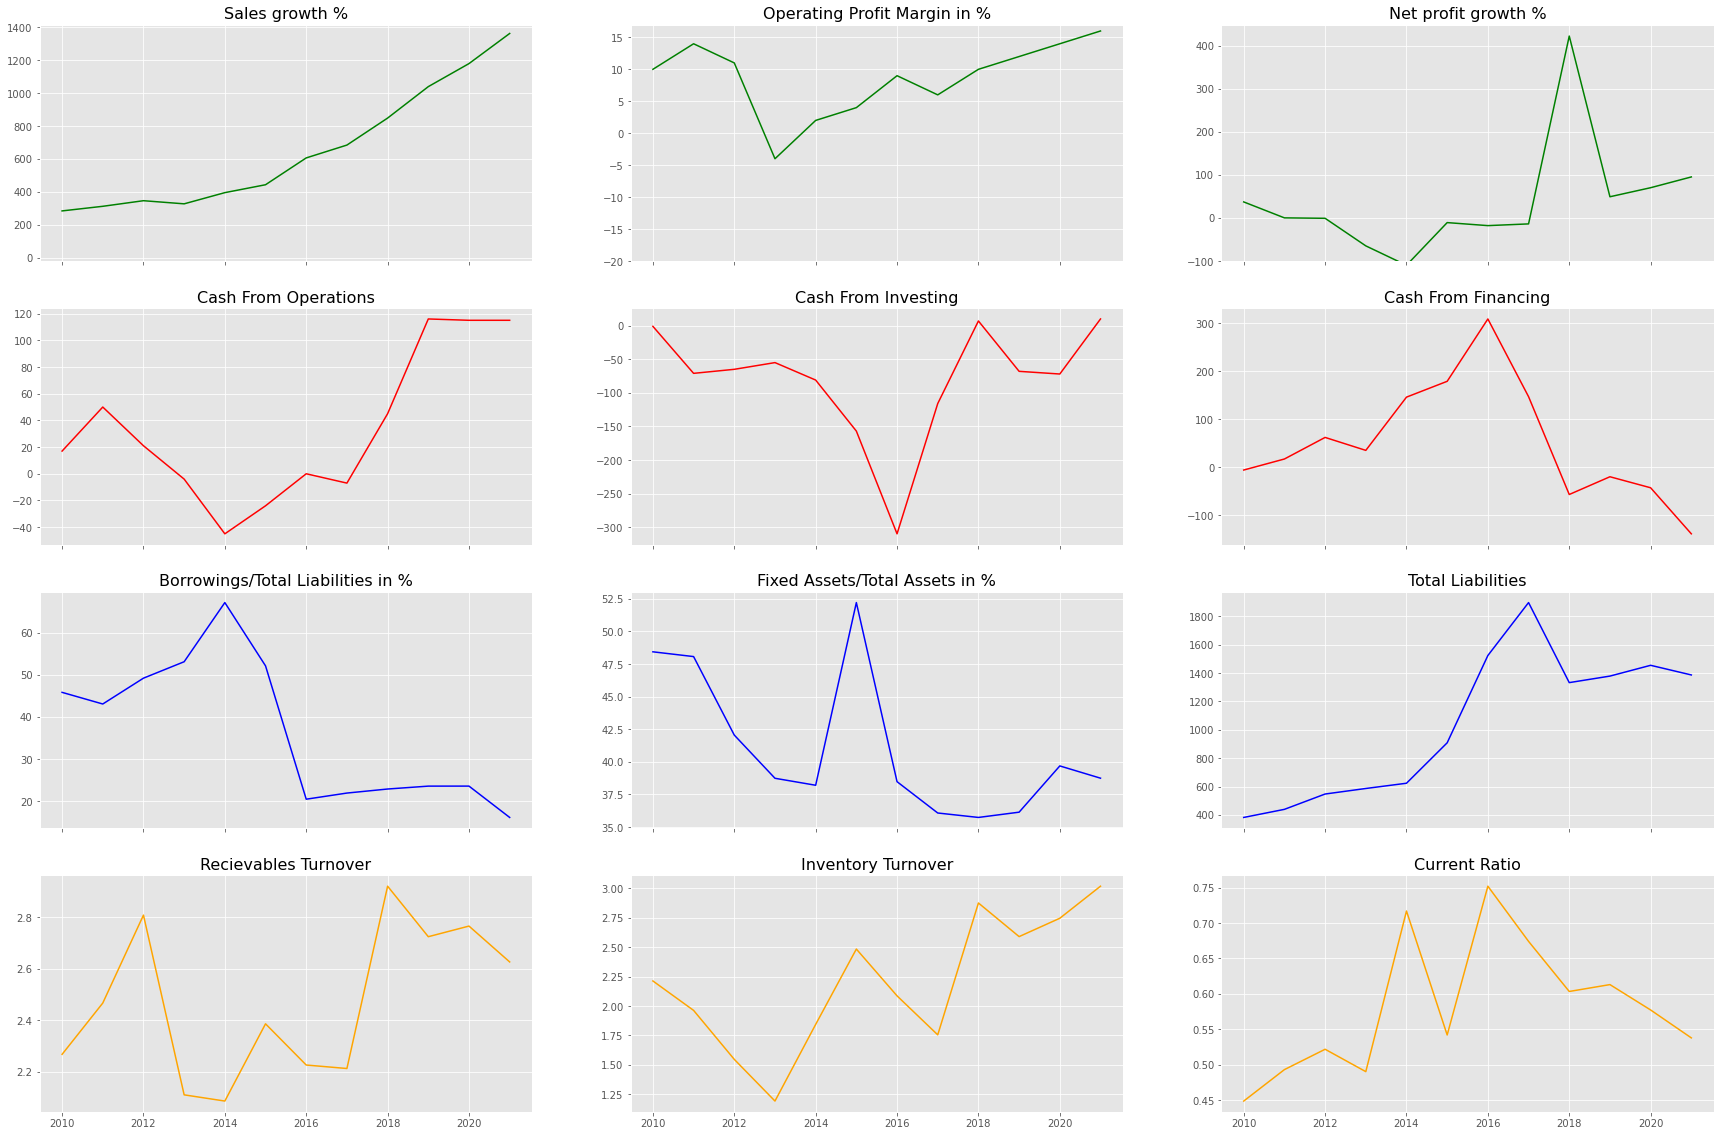

In [10]:
# Plotting Trends
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows=4, ncols=3,sharex=True) 
fig.set_size_inches((30, 20))

ticker_input=input("Enter Ticker of Company whose trends are to be visualized?")

chart_plot_pnl(conso_pnl_df[conso_pnl_df['TICKER/Company Name']==str(ticker_input)])
chart_plot_cf(conso_cf_df[conso_cf_df['TICKER/Company Name']==str(ticker_input)])
chart_plot_bl(conso_bl_df[conso_bl_df['TICKER/Company Name']==str(ticker_input)])